In [1]:
#importing crucial libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from pandas.plotting import autocorrelation_plot
%matplotlib inline

In [2]:
#importing the TTM data
data=pd.read_csv('/content/TTM_data.csv')
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-13,10.620000,10.640000,10.510000,10.600000,9.197446,136500
1,2005-07-14,10.500000,10.500000,10.330000,10.390000,9.015231,136000
2,2005-07-15,10.500000,10.650000,10.500000,10.550000,9.154059,158700
3,2005-07-18,10.720000,10.740000,10.660000,10.720000,9.301566,88000
4,2005-07-19,10.800000,11.030000,10.800000,10.990000,9.535840,128000
...,...,...,...,...,...,...,...
4274,2022-07-06,26.180000,26.570000,26.129999,26.420000,26.420000,623700
4275,2022-07-07,27.200001,27.879999,27.200001,27.700001,27.700001,715700
4276,2022-07-08,27.750000,28.090000,27.690001,27.900000,27.900000,355300
4277,2022-07-11,27.450001,27.540001,27.219999,27.260000,27.260000,341700


In [3]:
#checking for missing values and dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4279 non-null   object 
 1   Open       4279 non-null   float64
 2   High       4279 non-null   float64
 3   Low        4279 non-null   float64
 4   Close      4279 non-null   float64
 5   Adj Close  4279 non-null   float64
 6   Volume     4279 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 234.1+ KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4.279000e+03
mean,22.374447,22.613160,22.108888,22.368939,21.805990,1.477393e+06
std,10.299331,10.374618,10.228782,10.297576,10.523917,9.398070e+05
min,3.170000,3.410000,3.050000,3.140000,2.907577,0.000000e+00
25%,14.695000,14.900000,14.505000,14.725000,13.620653,8.599500e+05
50%,20.990000,21.230000,20.790001,21.030001,20.409922,1.268200e+06
75%,29.355001,29.719999,29.100000,29.405000,29.132829,1.866100e+06
max,51.259998,51.799999,50.650002,51.470001,51.448509,1.085910e+07


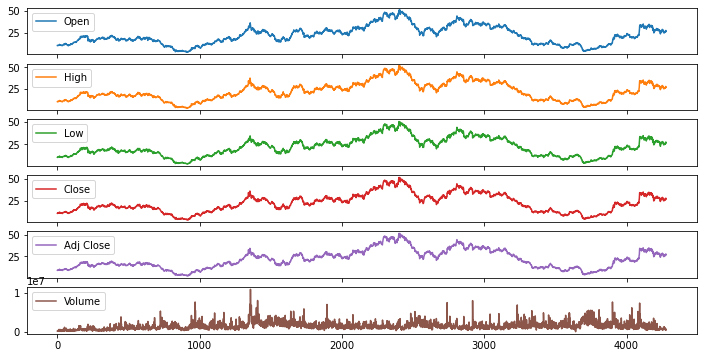

In [5]:
data.plot(legend=True,subplots=True, figsize=(12,6))
plt.show()



In [6]:
#choosing only the close values
date=pd.DataFrame(data['Date'])
closing_df1=pd.DataFrame(data['Close'])
close2=pd.concat([date,closing_df1],axis=1)
close2.shape

(4279, 2)

In [7]:
close2

,Date,Close
0,2005-07-13,10.600000
1,2005-07-14,10.390000
2,2005-07-15,10.550000
3,2005-07-18,10.720000
4,2005-07-19,10.990000
...,...,...
4274,2022-07-06,26.420000
4275,2022-07-07,27.700001
4276,2022-07-08,27.900000
4277,2022-07-11,27.260000


In [8]:
data.nunique()

Date         4279
Open         2434
High         2507
Low          2429
Close        2478
Adj Close    3532
Volume       3940
dtype: int64

In [9]:
#standardizing the data
mean = close2['Close'].mean()
s = close2['Close'].std()

close2['mean'] = mean
close2['standardized_value'] = (-close2['mean'] + close2['Close'])/s

close2.head()

,Date,Close,mean,standardized_value
0,2005-07-13,10.60,22.368939,-1.142884
1,2005-07-14,10.39,22.368939,-1.163278
2,2005-07-15,10.55,22.368939,-1.147740
3,2005-07-18,10.72,22.368939,-1.131231
4,2005-07-19,10.99,22.368939,-1.105011


In [10]:
standard_df1=pd.DataFrame(close2['standardized_value'])
new_df=pd.concat([date,standard_df1],axis=1)
new_df.shape

(4279, 2)

In [11]:
new_df

,Date,standardized_value
0,2005-07-13,-1.142884
1,2005-07-14,-1.163278
2,2005-07-15,-1.147740
3,2005-07-18,-1.131231
4,2005-07-19,-1.105011
...,...,...
4274,2022-07-06,0.393399
4275,2022-07-07,0.517701
4276,2022-07-08,0.537123
4277,2022-07-11,0.474972


In [12]:
#setting the dates as index of the data and dropping the date column then
new_df.index=pd.to_datetime(new_df.Date)
final_df=new_df.drop('Date',axis=1)
final_df

,standardized_value
Date,
2005-07-13,-1.142884
2005-07-14,-1.163278
2005-07-15,-1.147740
2005-07-18,-1.131231
2005-07-19,-1.105011
...,...
2022-07-06,0.393399
2022-07-07,0.517701
2022-07-08,0.537123


In [13]:
#splitting into training and test data
close_train=new_df[:3637]
close_train.drop('Date',inplace=True,axis=1)
close_train

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,standardized_value
Date,
2005-07-13,-1.142884
2005-07-14,-1.163278
2005-07-15,-1.147740
2005-07-18,-1.131231
2005-07-19,-1.105011
...,...
2019-12-16,-0.969057
2019-12-17,-0.932155
2019-12-18,-0.961288


In [14]:
close_test=new_df[3637:]
close_test.drop('Date',inplace=True,axis=1)
close_test

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,standardized_value
Date,
2019-12-23,-0.959346
2019-12-24,-0.975855
2019-12-26,-0.971970
2019-12-27,-0.975855
2019-12-30,-0.932155
...,...
2022-07-06,0.393399
2022-07-07,0.517701
2022-07-08,0.537123


In [15]:
close_train=np.array(close_train)
close_test=np.array(close_test)


In [16]:
#using timestep to create labels and features from the data
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(close_train, time_step)
X_test, y_test = create_dataset(close_test, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(3536, 100)
(3536,)


(None, None)

In [19]:
X_train

array([[-1.14288437, -1.16327752, -1.14773988, ..., -0.95254832,
        -1.01275666, -0.95837493],
       [-1.16327752, -1.14773988, -1.13123114, ..., -1.01275666,
        -0.95837493, -0.98459469],
       [-1.14773988, -1.13123114, -1.10501138, ..., -0.95837493,
        -0.98459469, -1.01761217],
       ...,
       [-1.14579767, -1.20697712, -1.23125468, ..., -0.97391257,
        -0.97197036, -0.96905706],
       [-1.20697712, -1.23125468, -1.22931247, ..., -0.97197036,
        -0.96905706, -0.93215517],
       [-1.23125468, -1.22931247, -1.27495428, ..., -0.96905706,
        -0.93215517, -0.96128824]])

In [20]:
y_train

array([-0.98459469, -1.01761217, -1.01372776, ..., -0.93215517,
       -0.96128824, -0.94866391])

In [21]:
print(X_test.shape), print(y_test.shape)

(541, 100)
(541,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for CNN-LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
close_train.shape

(3637, 1)

In [24]:
# Create the Stacked CNN-LSTM model
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Dense, Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
from tensorflow.keras.layers import MaxPooling1D, Flatten

model=Sequential()
model.add(Conv1D(64,kernel_size=3,activation='relu', input_shape=(100,1)))
model.add(Conv1D(64,kernel_size=3,activation='relu'))
model.add(MaxPooling1D(2))

model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=32,verbose=1)

Epoch 1/30
111/111 [==============================] - 25s 139ms/step - loss: 0.1276 - val_loss: 0.0426
Epoch 2/30
111/111 [==============================] - 7s 66ms/step - loss: 0.0536 - val_loss: 0.0274
Epoch 3/30
111/111 [==============================] - 7s 65ms/step - loss: 0.0448 - val_loss: 0.0234
Epoch 4/30
111/111 [==============================] - 7s 67ms/step - loss: 0.0403 - val_loss: 0.0204
Epoch 5/30
111/111 [==============================] - 7s 67ms/step - loss: 0.0375 - val_loss: 0.0129
Epoch 6/30
111/111 [==============================] - 7s 65ms/step - loss: 0.0351 - val_loss: 0.0136
Epoch 7/30
111/111 [==============================] - 7s 66ms/step - loss: 0.0331 - val_loss: 0.0128
Epoch 8/30
111/111 [==============================] - 7s 65ms/step - loss: 0.0319 - val_loss: 0.0108
Epoch 9/30
111/111 [==============================] - 7s 65ms/step - loss: 0.0321 - val_loss: 0.0202
Epoch 10/30
111/111 [==============================] - 7s 66ms/step - loss: 0.0310 - val_

In [27]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 0s 17ms/step


In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
train_rmse=math.sqrt(mean_squared_error(y_train,train_predict))
test_rmse=math.sqrt(mean_squared_error(y_test,test_predict))
print(f"train_rmse={train_rmse} and test_rmse={test_rmse}")

train_rmse=0.06416429794236375 and test_rmse=0.07881697244178562


In [29]:
train_mae=mean_absolute_error(y_train,train_predict)
test_mae=mean_absolute_error(y_test,test_predict)
print(f"train_mae={train_mae} and test_mae={test_mae}")

train_mae=0.04736563976556635 and test_mae=0.05373620804403129


In [30]:
from sklearn.metrics import r2_score
train_r2square=r2_score(y_train,train_predict)
test_r2square=r2_score(y_test,test_predict)
print(f"train_r2square={train_r2square} and test_r2square={test_r2square}")

train_r2square=0.9958771538885179 and test_r2square=0.9913961669380678


In [31]:
standardized_df=pd.DataFrame(y_train)
standardized_df

,0
0,-0.984595
1,-1.017612
2,-1.013728
3,-1.008872
4,-0.989450
...,...
3531,-0.971970
3532,-0.969057
3533,-0.932155
3534,-0.961288


In [32]:
standardized_df['train_predict']=train_predict

In [33]:
standardized_df.rename(columns = {0:'y_train'}, inplace = True)
standardized_df

,y_train,train_predict
0,-0.984595,-1.001603
1,-1.017612,-0.985662
2,-1.013728,-1.022114
3,-1.008872,-1.023643
4,-0.989450,-1.022841
...,...,...
3531,-0.971970,-1.032139
3532,-0.969057,-0.971766
3533,-0.932155,-0.985472
3534,-0.961288,-0.958356


In [34]:
#converting the standardized values into original values for plotting
standardized_df['y_train']=standardized_df['y_train']*s + mean
standardized_df['train_predict']=standardized_df['train_predict']*s + mean
standardized_df

,y_train,train_predict
0,12.23,12.054852
1,11.89,12.219007
2,11.93,11.843644
3,11.98,11.827893
4,12.18,11.836151
...,...,...
3531,12.36,11.740411
3532,12.39,12.362106
3533,12.77,12.220963
3534,12.47,12.500194


In [35]:
standardized_df.index=pd.to_datetime(new_df.Date[:3536])

In [36]:
standardized_df_test=pd.DataFrame(y_test)
standardized_df_test['test_predict']=test_predict
standardized_df_test.rename(columns = {0:'y_test'}, inplace = True)
standardized_df_test

,y_test,test_predict
0,-1.630378,-1.620530
1,-1.655626,-1.620550
2,-1.637175,-1.627996
3,-1.631349,-1.625362
4,-1.642031,-1.618778
...,...,...
536,0.366209,0.330331
537,0.393399,0.340076
538,0.517701,0.344528
539,0.537123,0.467366


In [37]:
standardized_df_test.index=pd.to_datetime(new_df.Date[3738:])

In [38]:
standardized_df_test['y_test']=standardized_df_test['y_test']*s + mean
standardized_df_test['test_predict']=standardized_df_test['test_predict']*s + mean
standardized_df_test

,y_test,test_predict
Date,,
2020-05-19,5.580000,5.681410
2020-05-20,5.320000,5.681204
2020-05-21,5.510000,5.604530
2020-05-22,5.570000,5.631649
2020-05-26,5.460000,5.699448
...,...,...
2022-07-06,26.139999,25.770546
2022-07-07,26.420000,25.870897
2022-07-08,27.700001,25.916744


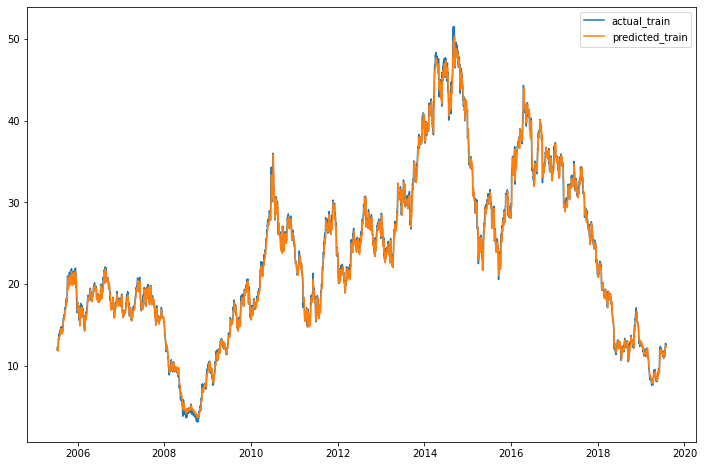

In [39]:
#plotting the original vs the predicted values
plt.figure(figsize=(12,8))
plt.plot(standardized_df['y_train'])
plt.plot(standardized_df['train_predict'])
plt.legend(["actual_train","predicted_train"])

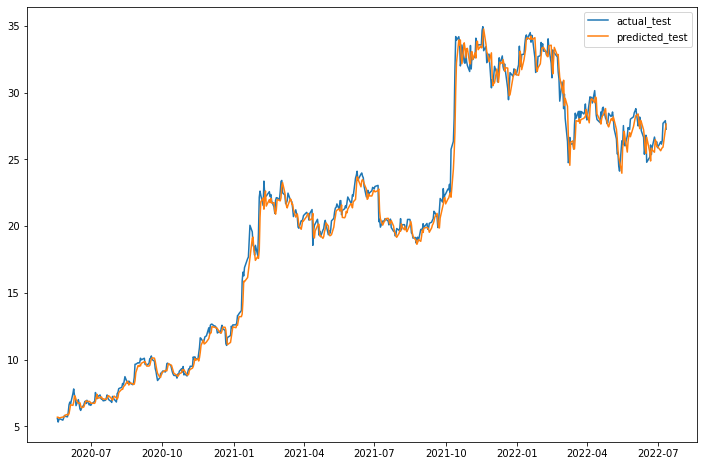

In [40]:
plt.figure(figsize=(12,8))
plt.plot(standardized_df_test['y_test'])
plt.plot(standardized_df_test['test_predict'])
plt.legend(["actual_test","predicted_test"])